<a href="https://colab.research.google.com/github/vanshika2424/Airpredictionmodel/blob/main/aqi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [6]:
df = pd.read_csv("/content/aqi.csv", encoding='unicode_escape')

In [7]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,01-02-1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,01-02-1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,01-02-1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,01-03-1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,01-03-1990


In [8]:
df.shape

(110118, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110118 entries, 0 to 110117
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     69557 non-null   object 
 1   sampling_date                110118 non-null  object 
 2   state                        110118 non-null  object 
 3   location                     110118 non-null  object 
 4   agency                       68025 non-null   object 
 5   type                         108490 non-null  object 
 6   so2                          100435 non-null  float64
 7   no2                          106269 non-null  float64
 8   rspm                         97328 non-null   float64
 9   spm                          58379 non-null   float64
 10  location_monitoring_station  101384 non-null  object 
 11  pm2_5                        4249 non-null    float64
 12  date                         110118 non-null  object 
dtyp

In [10]:
df.isnull().sum()

,0
stn_code,40561
sampling_date,0
state,0
location,0
agency,42093
type,1628
so2,9683
no2,3849
rspm,12790
spm,51739


In [11]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,100435.000000,106269.000000,97328.000000,58379.000000,4249.000000
mean,9.826828,22.788532,99.955625,213.093905,32.435232
std,8.648721,15.714942,64.064541,139.036084,25.360678
min,0.000000,0.000000,0.000000,0.000000,7.000000
25%,5.000000,13.300000,61.000000,128.000000,22.000000
50%,7.300000,19.000000,86.000000,188.000000,29.000000
75%,12.800000,27.500000,120.000000,270.000000,34.000000
max,228.000000,334.900000,1082.000000,2213.000000,318.000000


In [12]:
df.nunique()

,0
stn_code,198
sampling_date,4862
state,13
location,104
agency,21
type,10
so2,1163
no2,1465
rspm,1422
spm,2185


In [13]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

stn_code (station code) sampling_date (date of sample collection) state (Indian State) location (location of sample collection) agency type (type of area) so2 (sulphur dioxide concentration) no2 (nitrogen dioxide concentration) rspm (respirable suspended particualte matter concentration) spm (suspended particulate matter) location_monitoring_station pm2_5 (particulate matter 2.5) date (date)


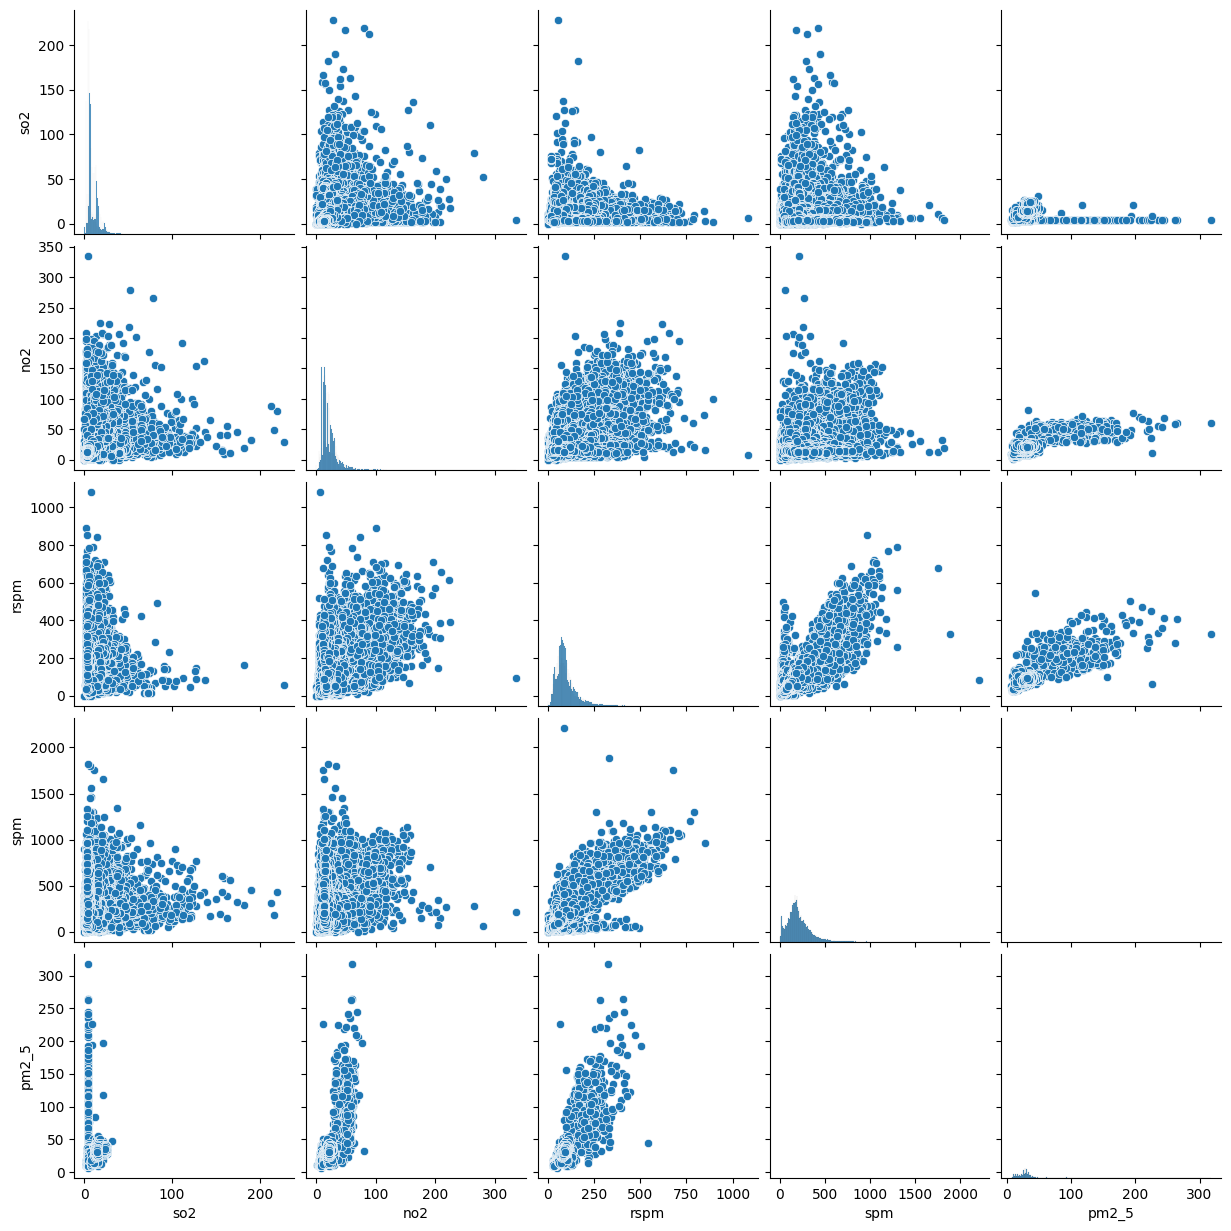

In [14]:
sns.pairplot(data=df)

In [15]:
df['state'].value_counts()

,count
state,
Andhra Pradesh,26368
Gujarat,21279
Assam,19361
Delhi,8551
Chandigarh,8520
Chhattisgarh,7831
Goa,6206
Himachal Pradesh,4801
Haryana,3420


[]

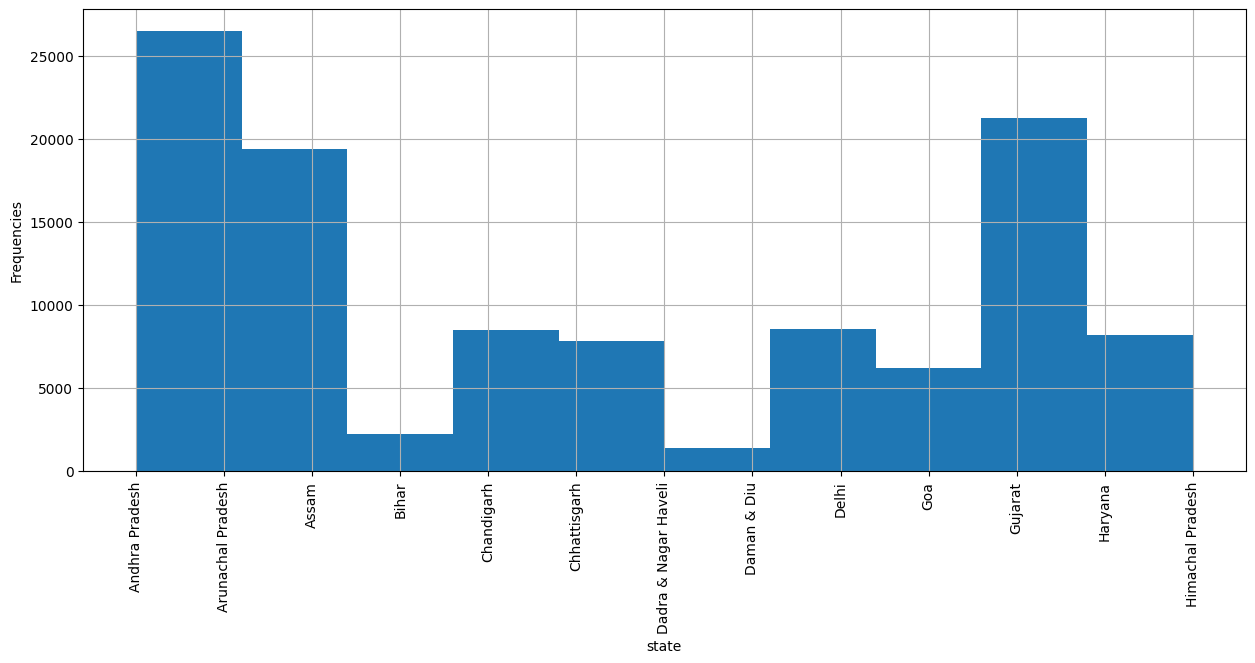

In [16]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()


In [17]:
df['type'].value_counts()

,count
type,
"Residential, Rural and other Areas",47627
Residential and others,27756
Industrial Area,17304
Industrial Areas,11355
Sensitive Area,2233
Sensitive Areas,1450
RIRUO,473
Sensitive,155
Residential,69


[]

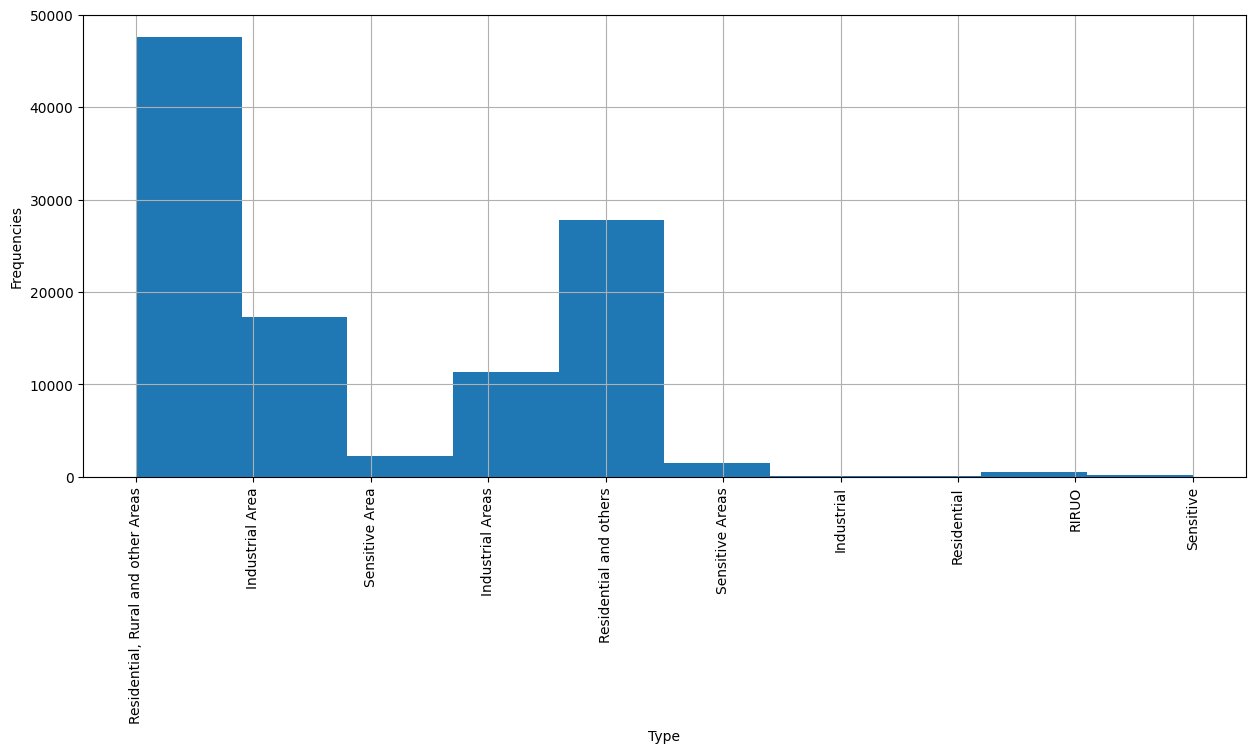

In [18]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()

In [19]:
df['agency'].value_counts()

,count
agency,
Andhra Pradesh State Pollution Control Board,15691
Assam State Pollution Control Board,13427
Gujarat State Pollution Control Board,8763
Goa State Pollution Control Board,5040
Chandigarh Pollution Control Committee,4614
Chattisgarh Environment Conservation Board,4051
Central Pollution Control Board,3604
National Environmental Engineering Research Institute,3243
Gujarat Pollution Control Board,1894


[]

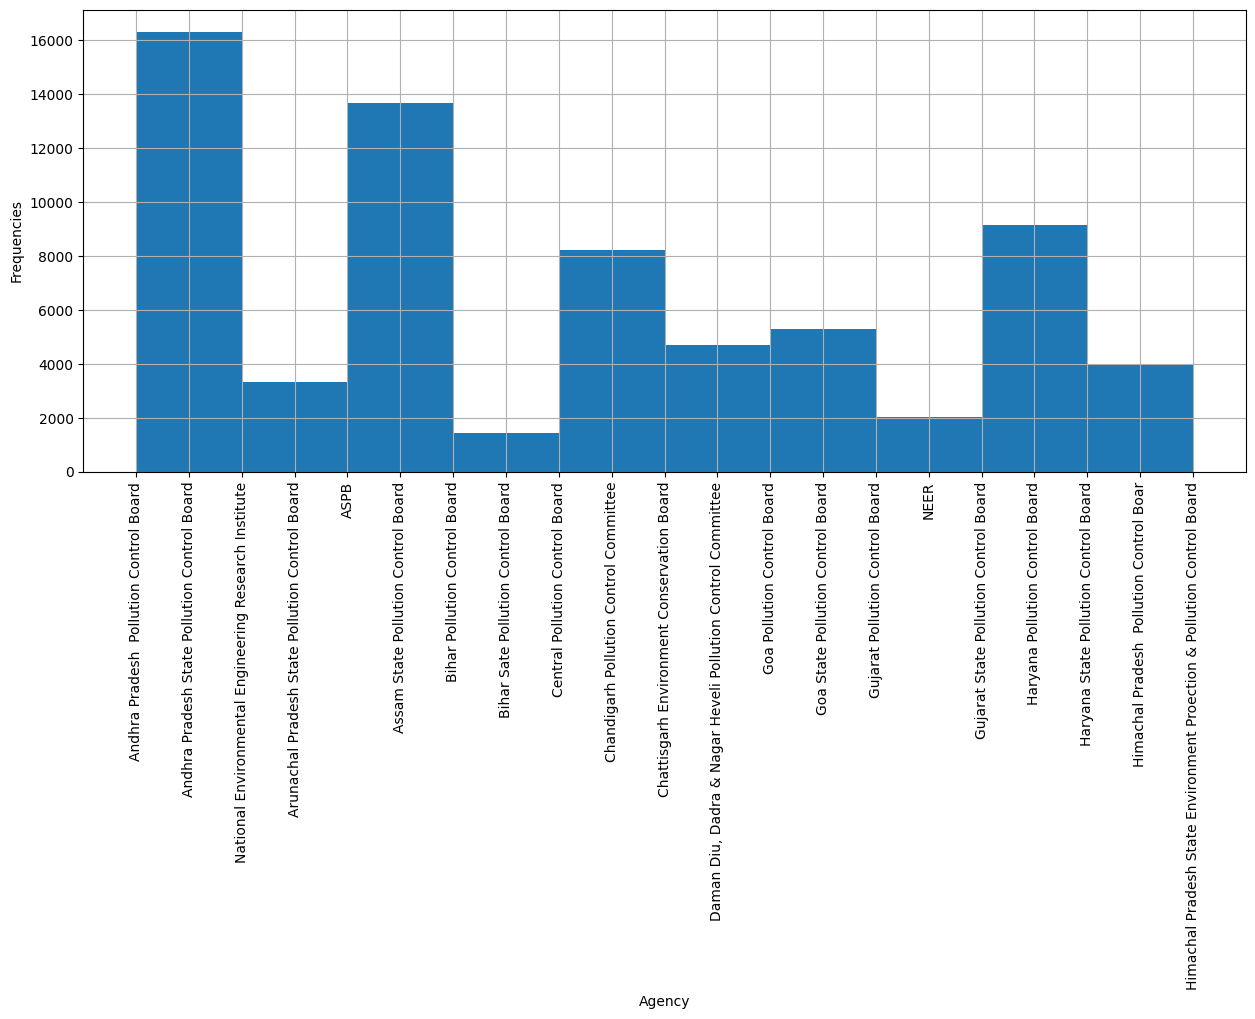

In [20]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.plot()

<Axes: xlabel='state', ylabel='so2'>

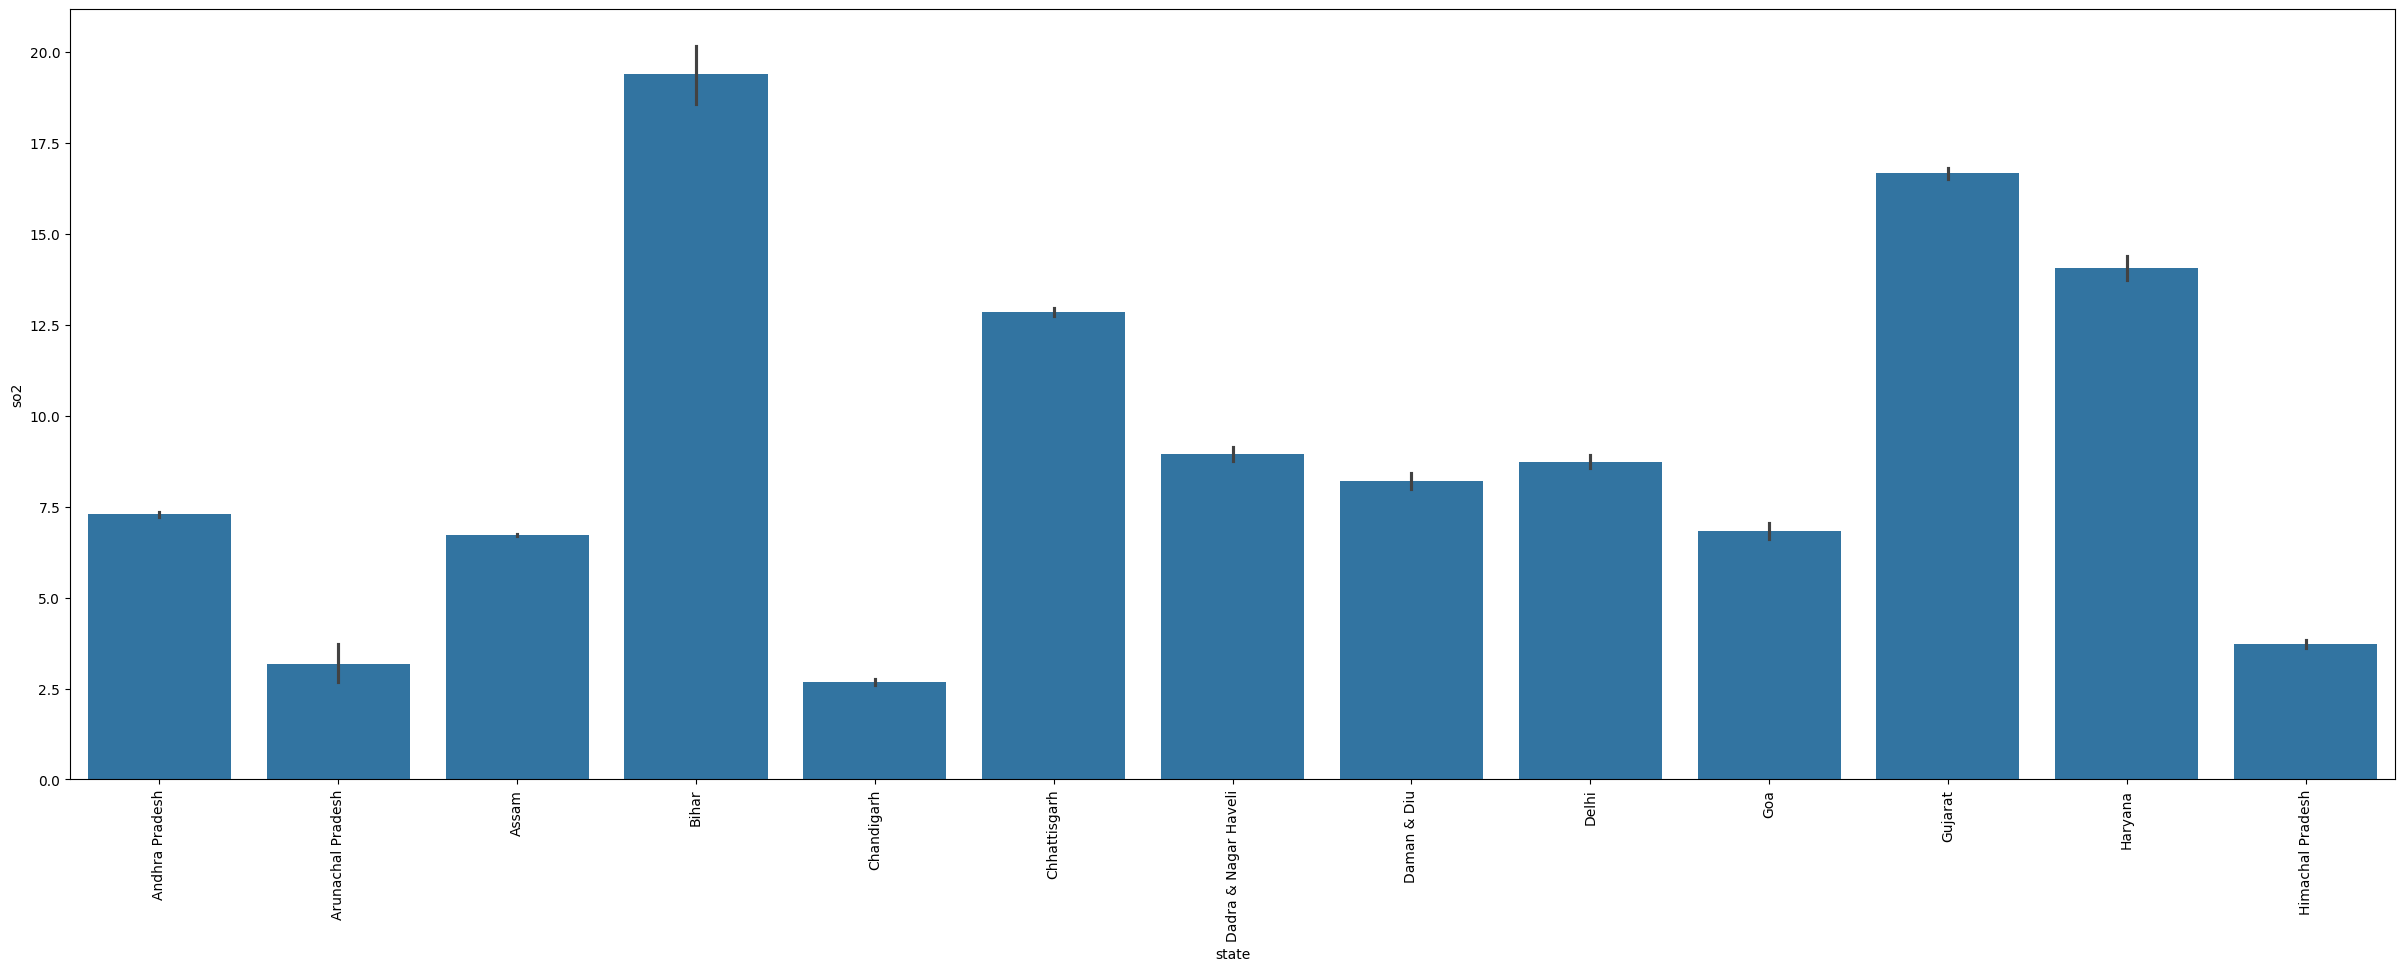

In [21]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',
            y='so2',
            data=df)


In [22]:
plt.rcParams['figure.figsize']=(30,10)
#default size of all figures

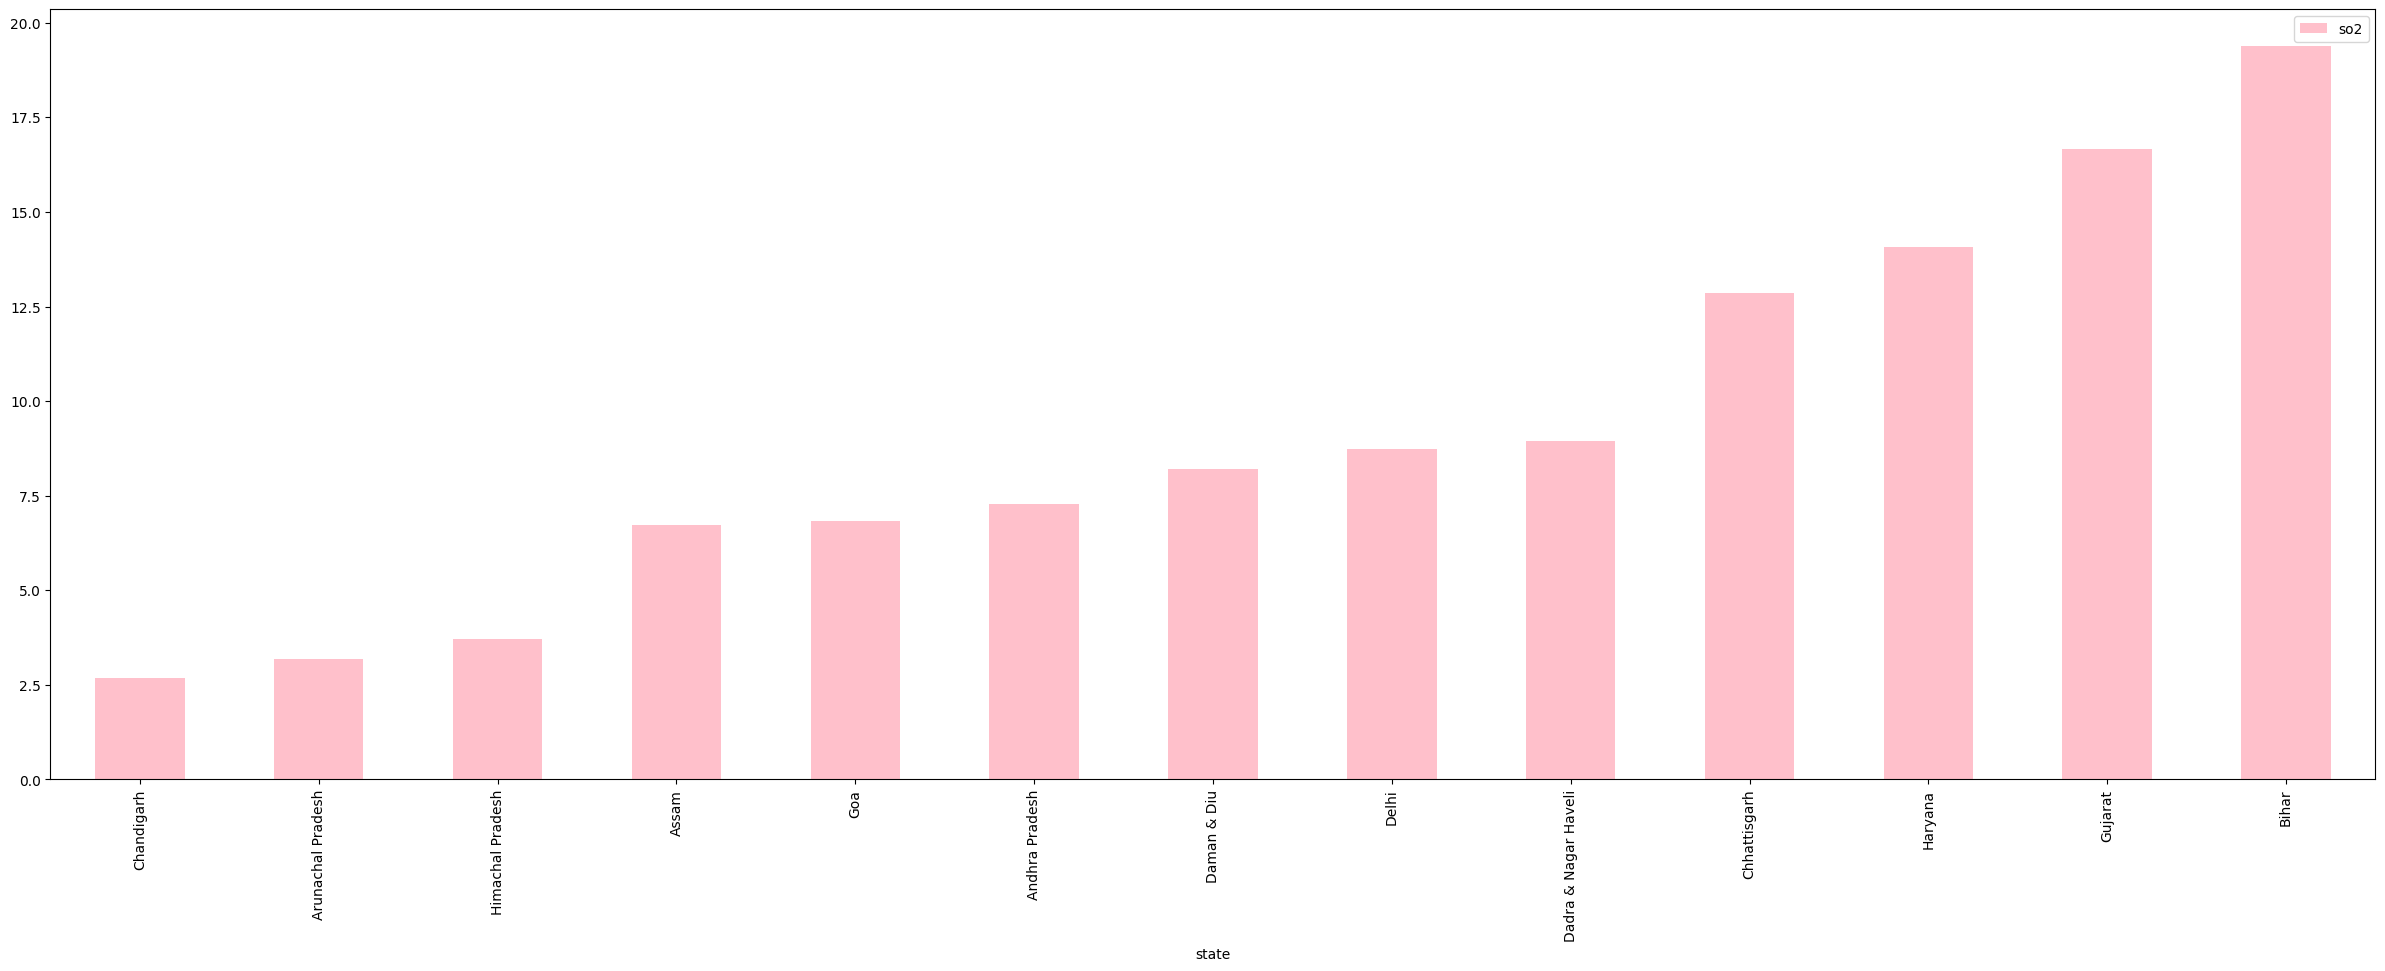

In [23]:
df[['so2','state']].groupby('state').mean().sort_values(by='so2').plot.bar(color='pink')
plt.show()

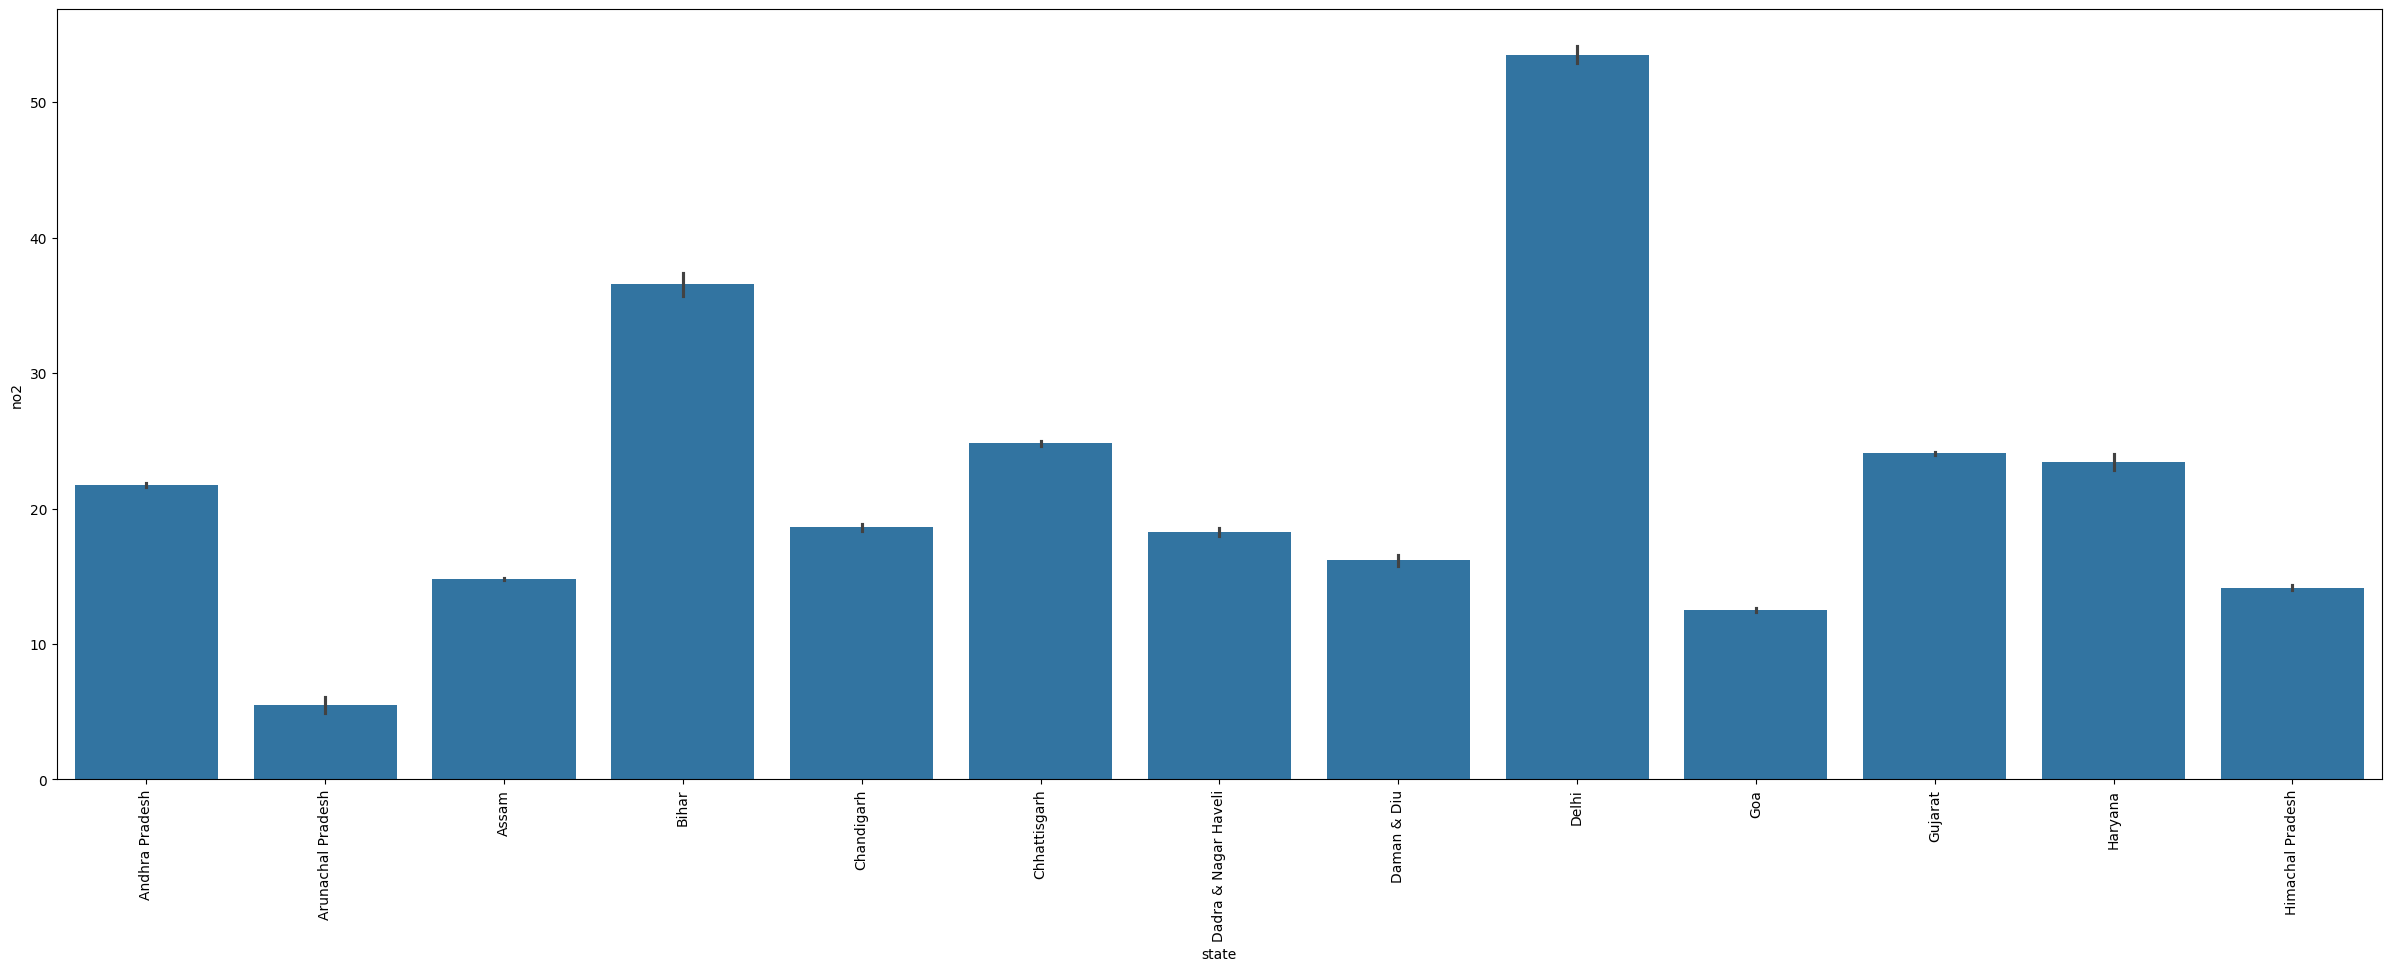

In [24]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df);

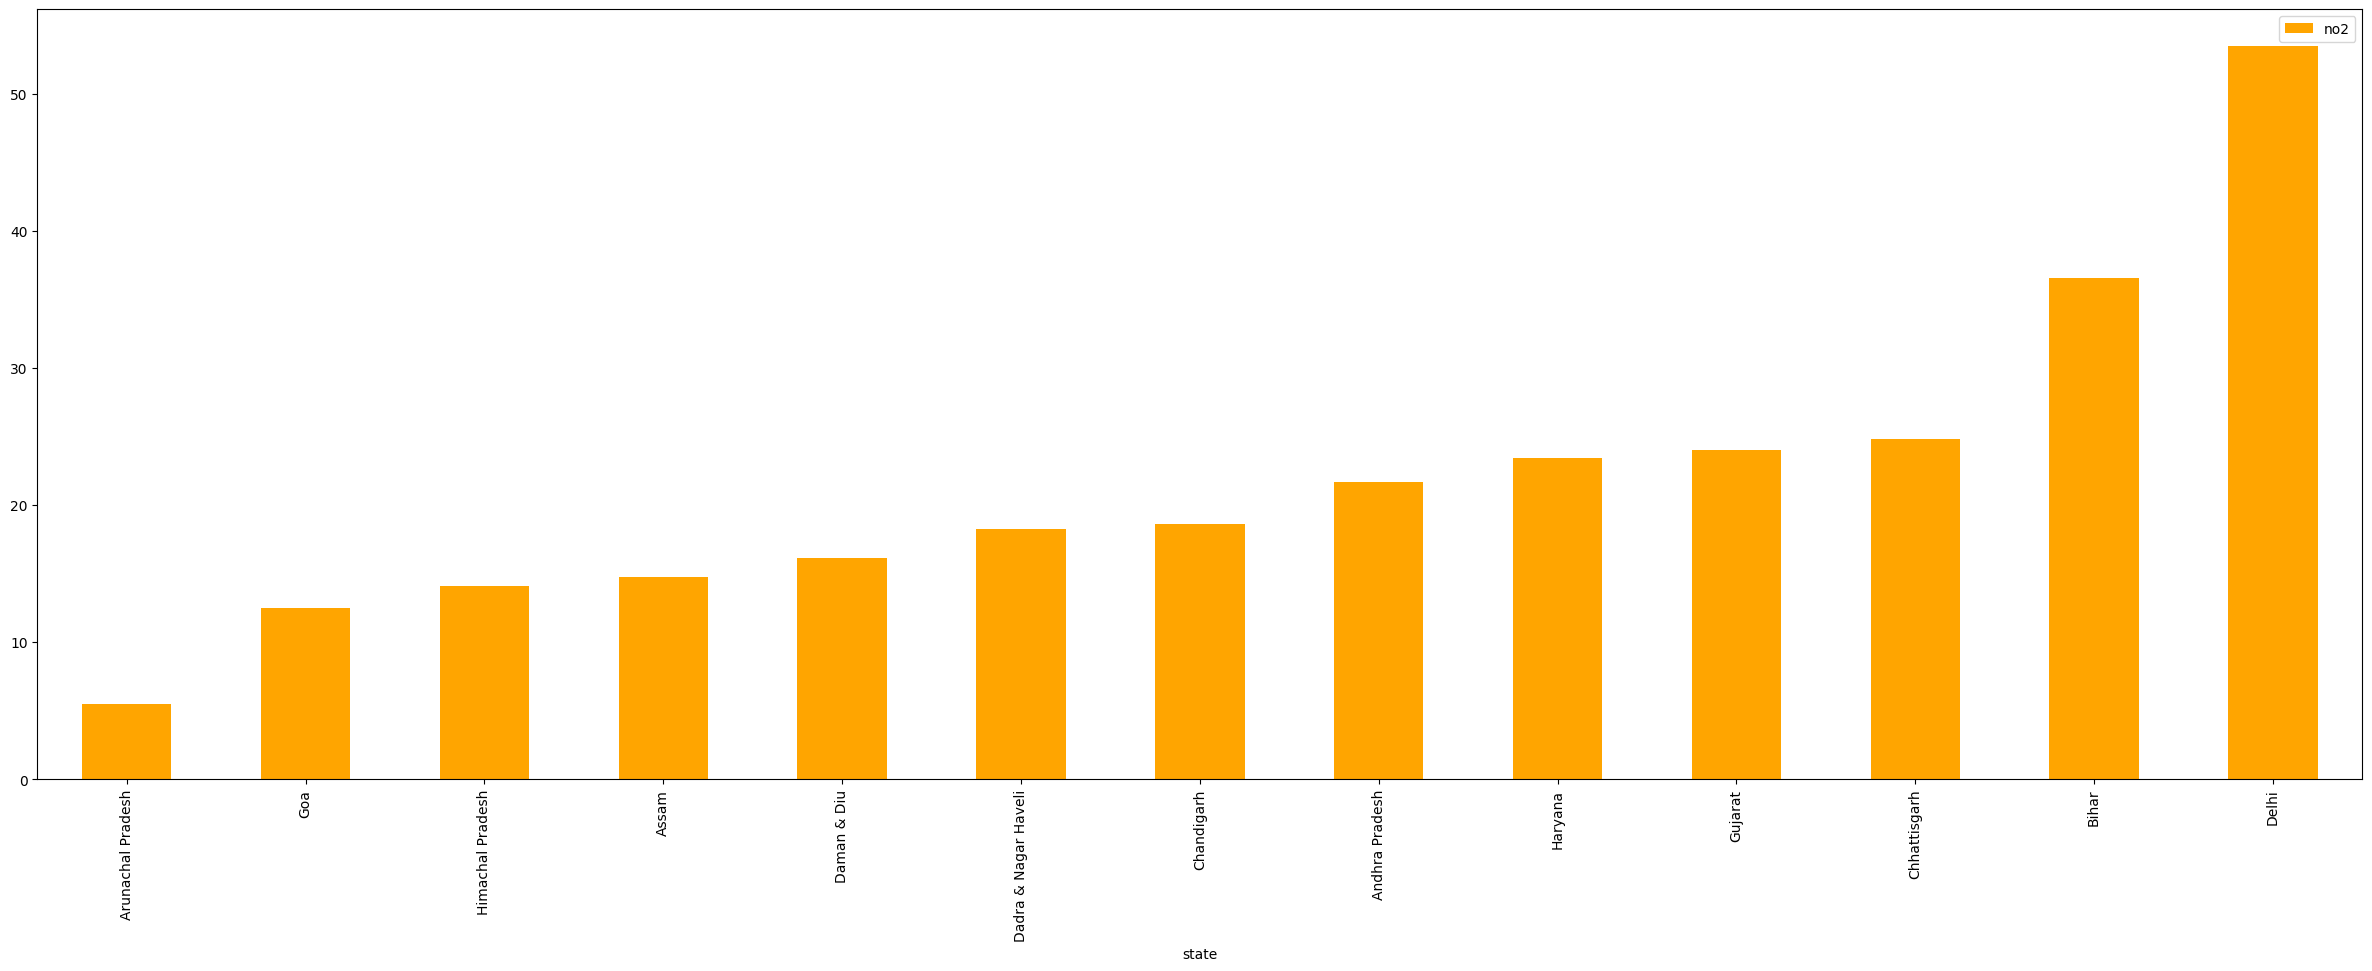

In [25]:
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='orange')
plt.show()


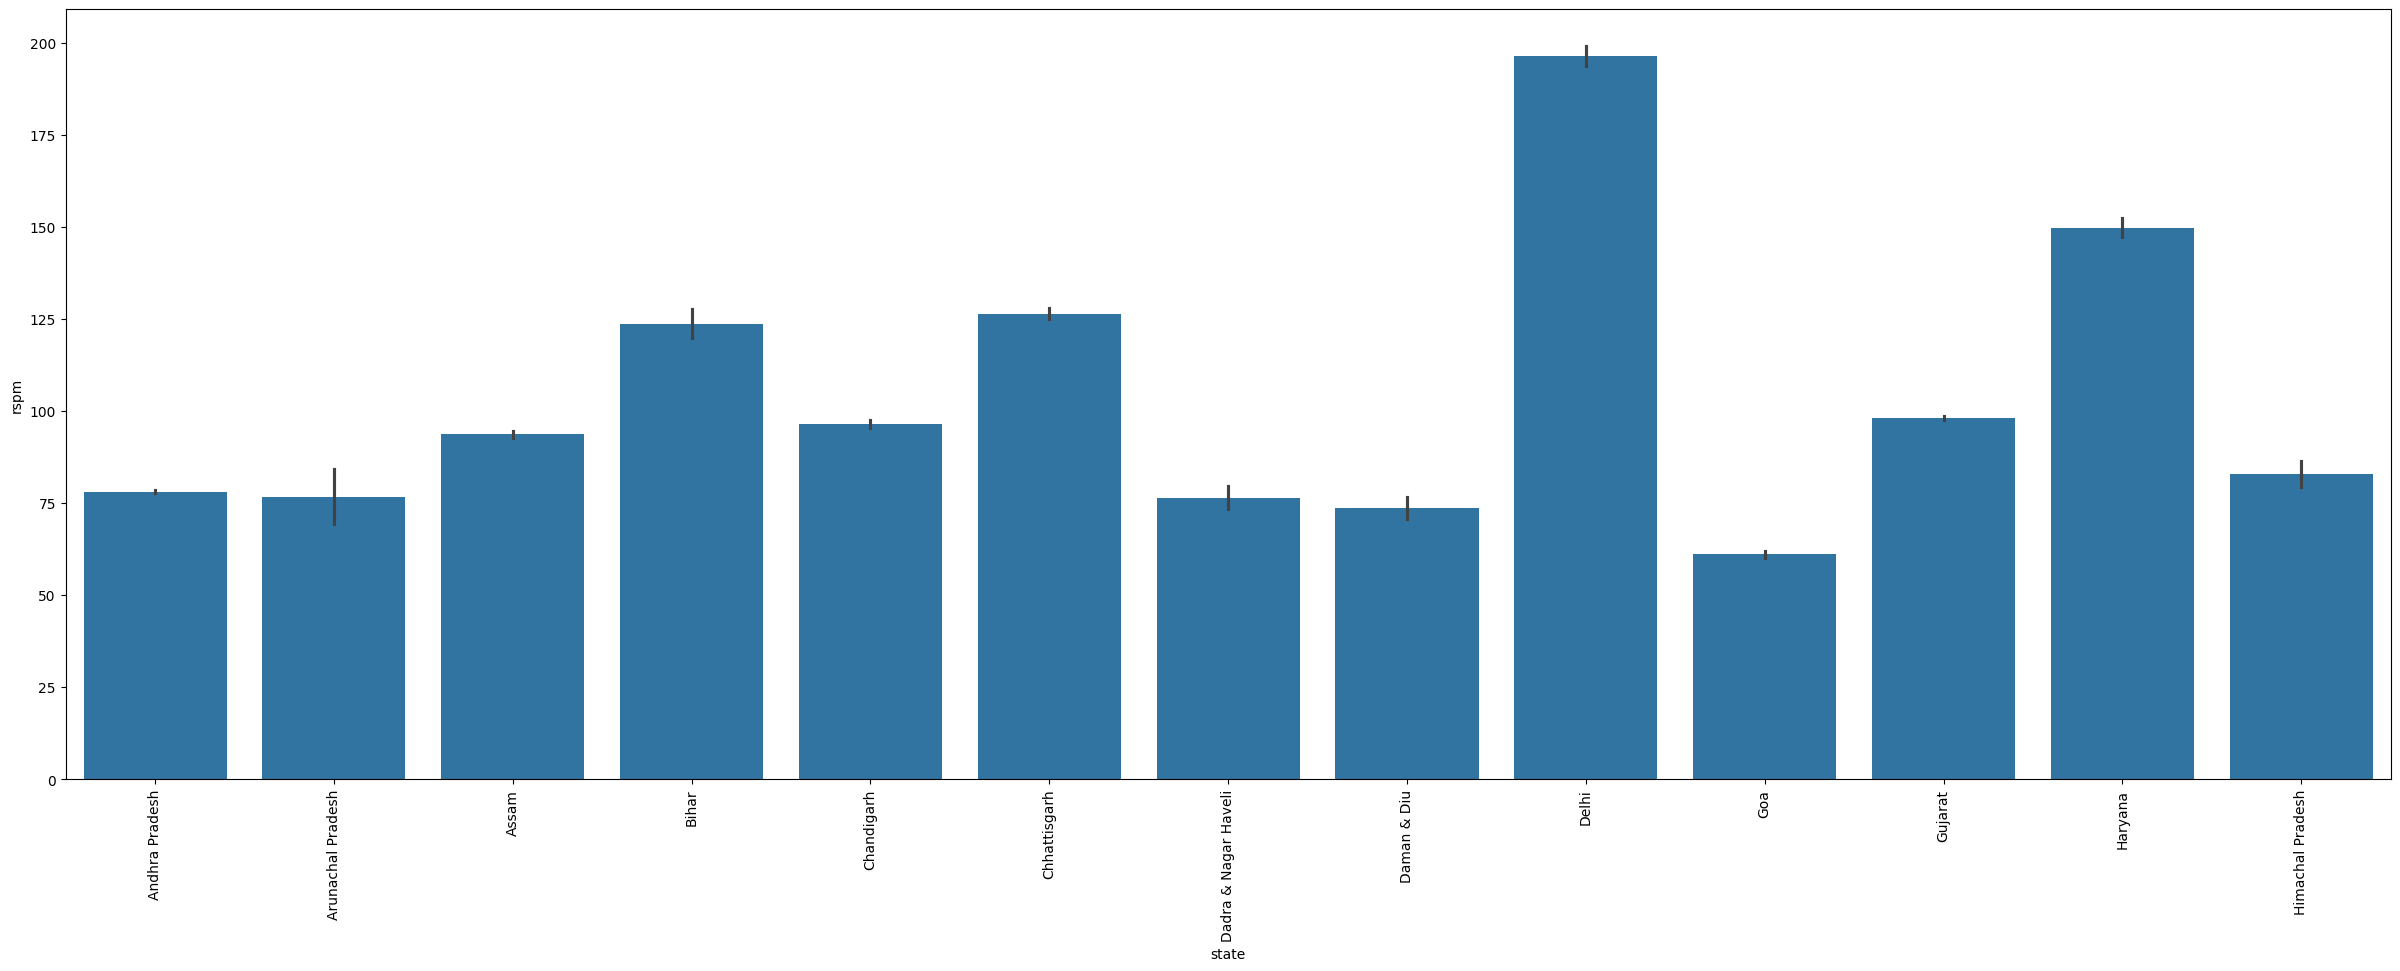

In [26]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df);

# Respirable Suspended Particulate Matter is generally classified as PM10 (diameter 10-2.5 microns) and PM2.5


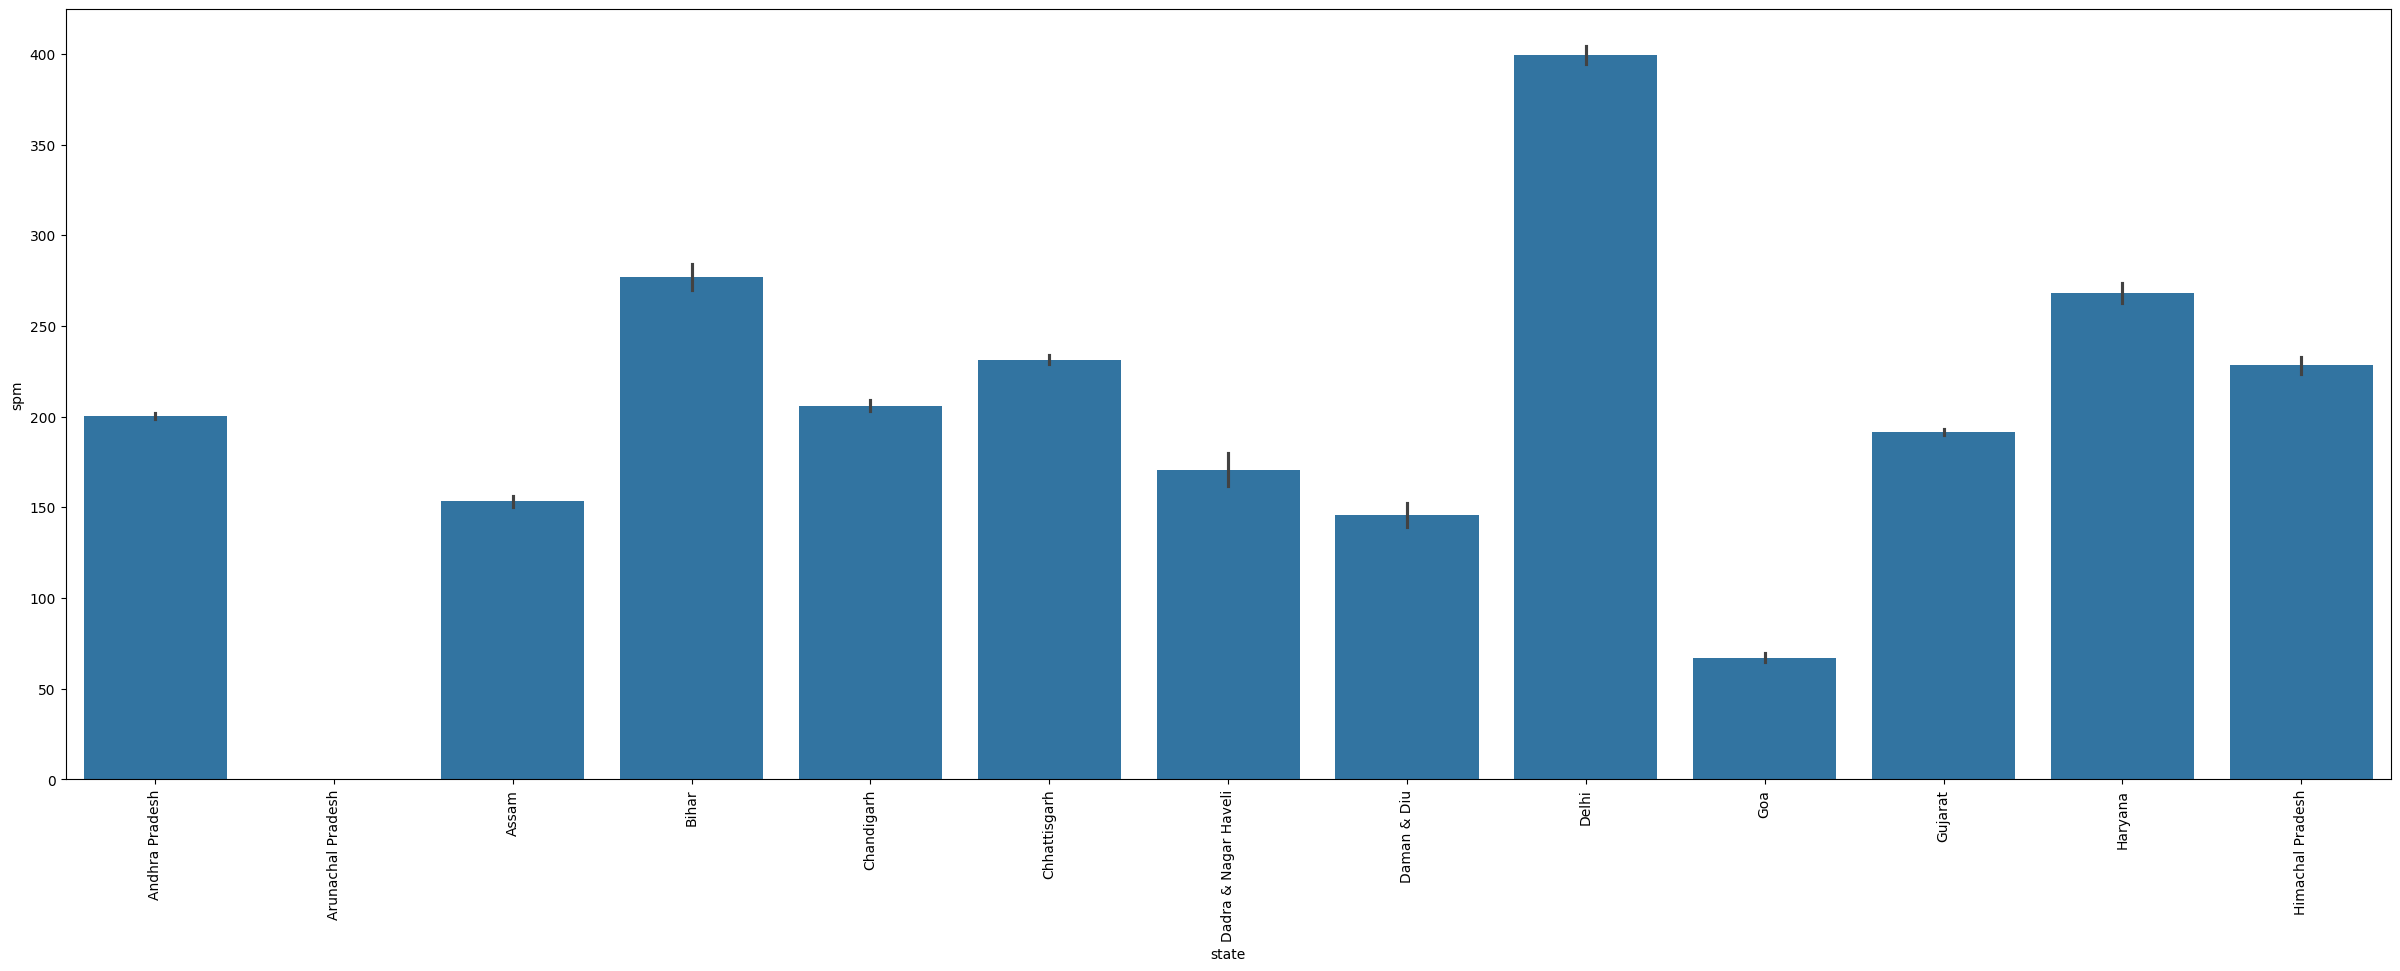

In [27]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=df);

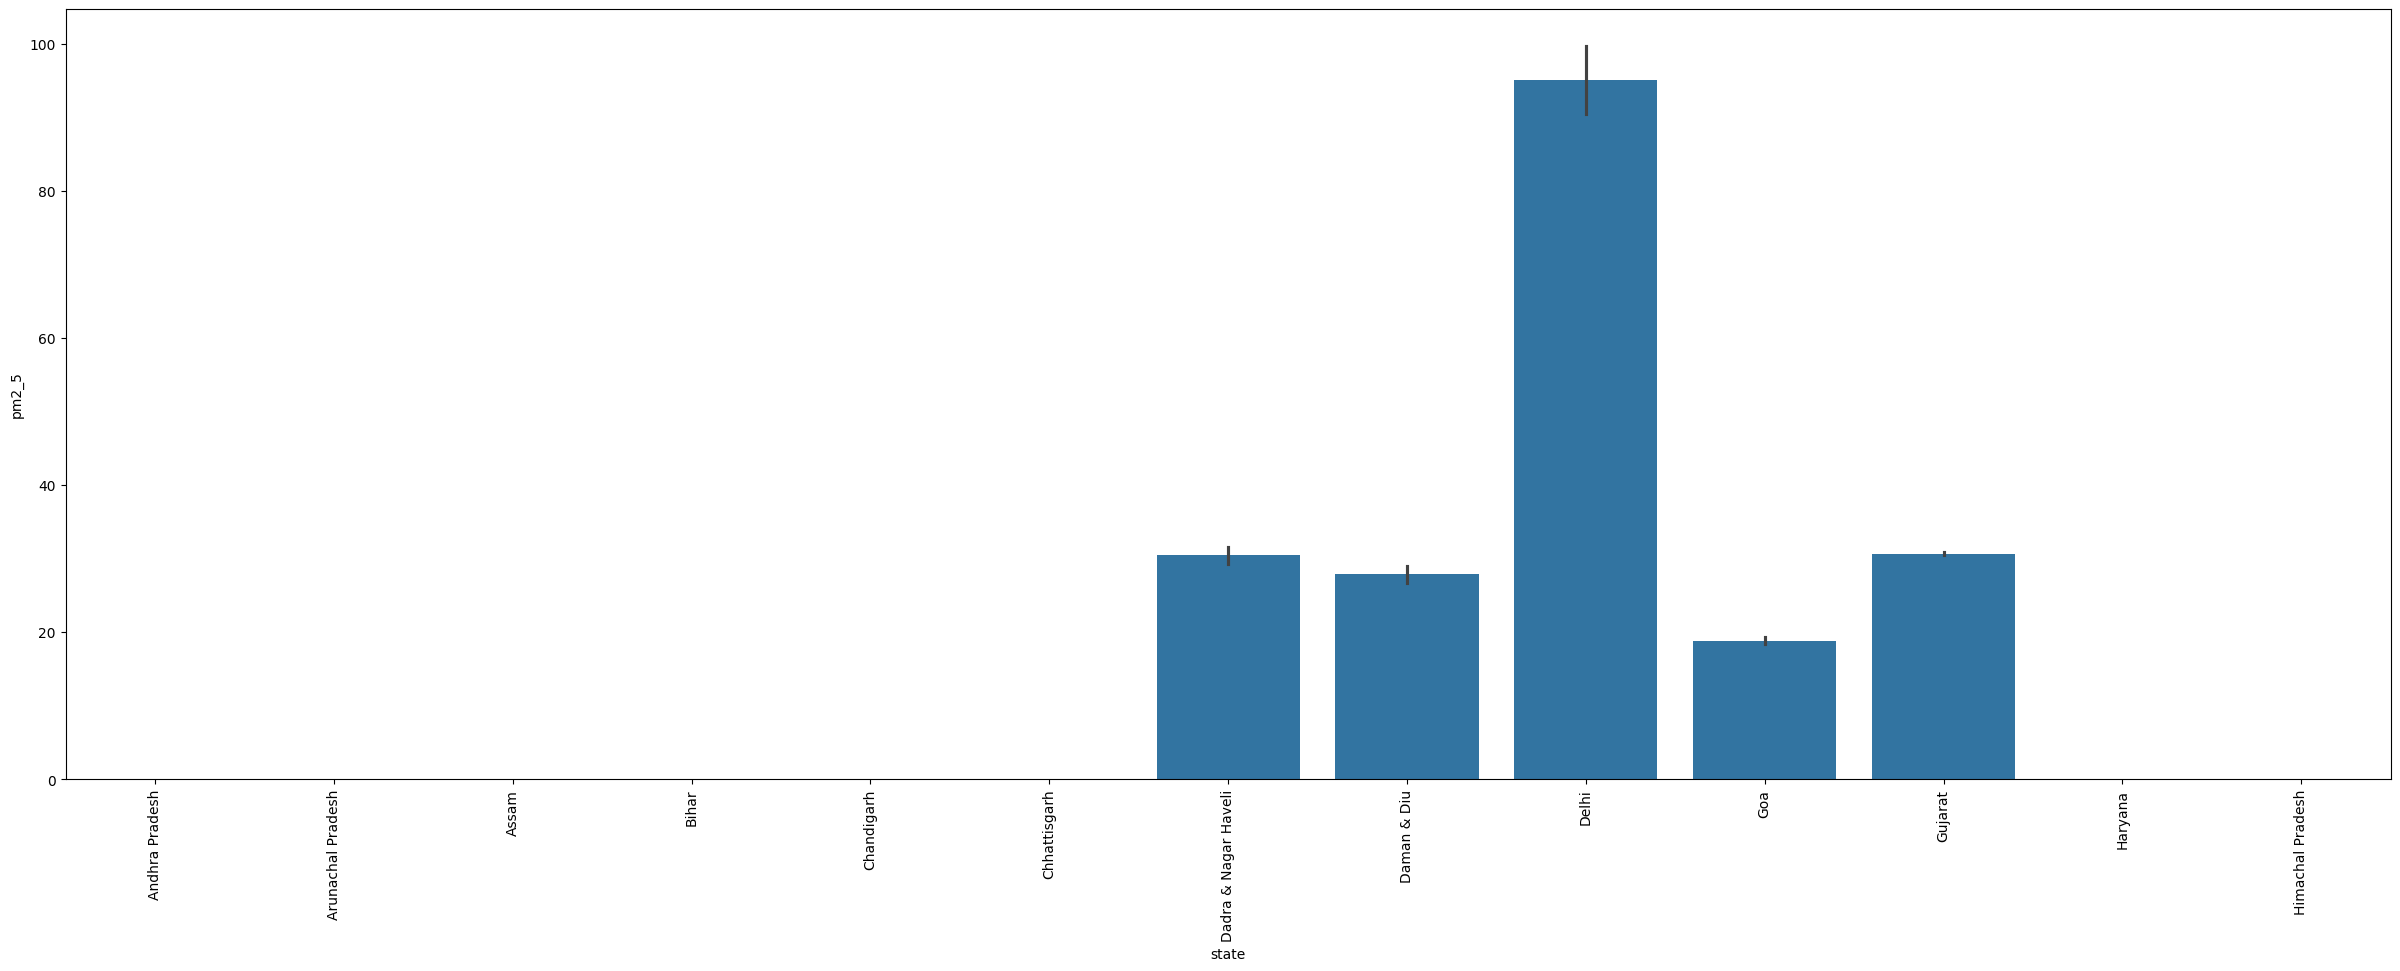

In [28]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='pm2_5',data=df);

In [29]:
nullvalues = df.isnull().sum().sort_values(ascending=False)

In [30]:
nullvalues


,0
pm2_5,105869
spm,51739
agency,42093
stn_code,40561
rspm,12790
so2,9683
location_monitoring_station,8734
no2,3849
type,1628
sampling_date,0


In [31]:
null_values_percentage= (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [32]:
missing_values_with_percentage= pd.concat([nullvalues,null_values_percentage],axis=1,keys=['Total','Percentage'])

In [33]:
missing_values_with_percentage

,Total,Percentage
pm2_5,105869,96.141412
spm,51739,46.985052
agency,42093,38.225358
stn_code,40561,36.834123
rspm,12790,11.614813
so2,9683,8.793294
location_monitoring_station,8734,7.931492
no2,3849,3.495341
type,1628,1.478414
sampling_date,0,0.000000


In [34]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)

In [35]:
df.isnull().sum()

,0
state,0
location,0
type,1628
so2,9683
no2,3849
rspm,12790
spm,51739
pm2_5,105869


In [36]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
110113,Himachal Pradesh,Nahan,Industrial Areas,NaN,14.1,NaN,797.0,NaN
110114,Himachal Pradesh,Nahan,Industrial Areas,NaN,12.9,NaN,382.0,NaN
110115,Himachal Pradesh,Nahan,Industrial Areas,NaN,13.3,NaN,281.0,NaN
110116,Himachal Pradesh,Nahan,Industrial Areas,NaN,12.7,NaN,198.0,NaN


In [37]:
df['location']=df['location'].fillna(df['location'].mode()[0])
df['type']=df['type'].fillna(df['type'].mode()[0])

In [38]:
df.fillna(0,inplace=True)

In [39]:
df.isnull().sum()

,0
state,0
location,0
type,0
so2,0
no2,0
rspm,0
spm,0
pm2_5,0


In [40]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
110113,Himachal Pradesh,Nahan,Industrial Areas,0.0,14.1,0.0,797.0,0.0
110114,Himachal Pradesh,Nahan,Industrial Areas,0.0,12.9,0.0,382.0,0.0
110115,Himachal Pradesh,Nahan,Industrial Areas,0.0,13.3,0.0,281.0,0.0
110116,Himachal Pradesh,Nahan,Industrial Areas,0.0,12.7,0.0,198.0,0.0


In [41]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [42]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [43]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [44]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi

df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [45]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [46]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


In [47]:
df['AQI_Range'].value_counts()

,count
AQI_Range,
Good,52428
Poor,31849
Unhealthy,9974
Moderate,8543
Hazardous,3755
Very unhealthy,3569


In [48]:
X=df[['SOi','Noi','Rpi','SPMi']]
Y=df['AQI']
X.head()

,SOi,Noi,Rpi,SPMi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [49]:
Y.head()


,AQI
0,21.750
1,8.750
2,35.625
3,18.375
4,9.375


Given a dataset
(
𝑋
,
𝑌
)
(X,Y):

The function shuffles the data and splits it into training and testing sets.
80% of the data is assigned to training (
𝑋
train
,
𝑌
train
X
train
​
 ,Y
train
​
 ).
20% of the data is assigned to testing (
𝑋
test
,
𝑌
test
X
test
​
 ,Y
test
​
 ).
Example:
If
𝑋
X has 100 samples with 10 features each, and
𝑌
Y has 100 labels:

𝑋
train
X
train
​
 :
(
80
,
10
)
(80,10)
𝑋
test
X
test
​
 :
(
20
,
10
)
(20,10)
𝑌
train
Y
train
​
 :
(
80
,
)
(80,)
𝑌
test
Y
test
​
 :
(
20
,
)
(20,)


In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(88094, 4) (22024, 4) (88094,) (22024,)


Linear Regression

In [51]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [52]:
train_pred=model.predict(X_train)
train_comparison = pd.DataFrame({
    'Actual Values': Y_train,
    'Predictions': train_pred
})
print("Train Predictions vs Actual Values:")
print(train_comparison.head())

Train Predictions vs Actual Values:
       Actual Values  Predictions
48940     148.000000   146.345525
4141      155.333333   171.538541
32967      21.250000    19.578421
50583     146.000000   152.685765
65910     219.000000   208.095270


In [53]:
test_pred=model.predict(X_test)
test_comparison = pd.DataFrame({
    'Actual Test Values': Y_test,
    'Test Predictions': test_pred
})

print("Test Predictions vs Actual Test Values:")
print(test_comparison.head())

Test Predictions vs Actual Test Values:
       Actual Test Values  Test Predictions
91795          181.333333        181.471165
7959           102.666667        104.306834
16563            0.000000         15.771642
48074           28.750000         24.751987
89034          299.000000        304.276176


In [54]:
RMSE_train = np.sqrt(metrics.mean_squared_error(Y_train, train_pred))
RMSE_test = np.sqrt(metrics.mean_squared_error(Y_test, test_pred))

# Printing RMSE values
print("RMSE Training Data = ", RMSE_train)
print("RMSE Test Data = ", RMSE_test)
print('-' * 50)

# Calculating R-squared for training and test data using the linear regression model
print('R-squared value on train:', model.score(X_train, Y_train))
print('R-squared value on test:', model.score(X_test, Y_test))

RMSE Training Data =  10.902806783283188
RMSE Test Data =  10.951751183689366
--------------------------------------------------
R-squared value on train: 0.9897013223453677
R-squared value on test: 0.9899789846843552


Decisin Tree Regressor

In [55]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [56]:
train_pred=DT.predict(X_train)
train_comparison = pd.DataFrame({
    'Actual Values': Y_train,
    'Predictions': train_pred
})
print("Train Predictions vs Actual Values:")
print(train_comparison.head())

Train Predictions vs Actual Values:
       Actual Values  Predictions
48940     148.000000   148.000000
4141      155.333333   155.333333
32967      21.250000    21.250000
50583     146.000000   146.000000
65910     219.000000   219.000000


In [57]:
test_pred=DT.predict(X_test)
test_comparison = pd.DataFrame({
    'Actual Test Values': Y_test,
    'Test Predictions': test_pred
})

print("Test Predictions vs Actual Test Values:")
print(test_comparison.head())

Test Predictions vs Actual Test Values:
       Actual Test Values  Test Predictions
91795          181.333333        181.333333
7959           102.666667        102.666667
16563            0.000000          0.000000
48074           28.750000         28.750000
89034          299.000000        299.000000


In [58]:
RMSE_train = np.sqrt(metrics.mean_squared_error(Y_train, train_pred))
RMSE_test = np.sqrt(metrics.mean_squared_error(Y_test, test_pred))


print("RMSE Training Data = ", RMSE_train)
print("RMSE Test Data = ", RMSE_test)
print('-' * 50)


print('R-squared value on train:', DT.score(X_train, Y_train))
print('R-squared value on test:', DT.score(X_test, Y_test))

RMSE Training Data =  1.1352168907869988e-13
RMSE Test Data =  1.4028005556424084
--------------------------------------------------
R-squared value on train: 1.0
R-squared value on test: 0.9998355868887918


Random Forest Regressor

In [59]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [60]:
train_pred=RF.predict(X_train)
train_comparison = pd.DataFrame({
    'Actual Values': Y_train,
    'Predictions': train_pred
})
print("Train Predictions vs Actual Values:")
print(train_comparison.head())

Train Predictions vs Actual Values:
       Actual Values  Predictions
48940     148.000000   148.000000
4141      155.333333   155.333333
32967      21.250000    21.250000
50583     146.000000   146.000000
65910     219.000000   219.000000


In [61]:
test_pred=RF.predict(X_test)
test_comparison = pd.DataFrame({
    'Actual Test Values': Y_test,
    'Test Predictions': test_pred
})

print("Test Predictions vs Actual Test Values:")
print(test_comparison.head())

Test Predictions vs Actual Test Values:
       Actual Test Values  Test Predictions
91795          181.333333        181.333333
7959           102.666667        102.666667
16563            0.000000          0.000000
48074           28.750000         28.750000
89034          299.000000        299.000000


In [62]:
RMSE_train = np.sqrt(metrics.mean_squared_error(Y_train, train_pred))
RMSE_test = np.sqrt(metrics.mean_squared_error(Y_test, test_pred))


print("RMSE Training Data = ", RMSE_train)
print("RMSE Test Data = ", RMSE_test)
print('-' * 50)


print('R-squared value on train:', RF.score(X_train, Y_train))
print('R-squared value on test:', RF.score(X_test, Y_test))

RMSE Training Data =  0.3523869226271851
RMSE Test Data =  1.3355656057433507
--------------------------------------------------
R-squared value on train: 0.9999892416814438
R-squared value on test: 0.9998509695400509


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [64]:
X2 = df[['SOi','Noi','Rpi','SPMi']]
Y2 = df['AQI_Range']

In [65]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=70)


Logistic Regression

In [66]:
from sklearn.metrics import accuracy_score, cohen_kappa_score

In [67]:
log_reg = LogisticRegression()
log_reg.fit(X_train2, Y_train2)


train_preds2 = log_reg.predict(X_train2)

train_accuracy = accuracy_score(Y_train2, train_preds2)
print("Model accuracy on train data: {:.2f}%".format(train_accuracy * 100))


Model accuracy on train data: 73.00%


In [68]:
test_preds2 = log_reg.predict(X_test2)

# 5. Calculate and print accuracy on the test data
test_accuracy = accuracy_score(Y_test2, test_preds2)
print("Model accuracy on test data: {:.2f}%".format(test_accuracy * 100))



Model accuracy on test data: 73.19%


In [69]:
kappa_score = cohen_kappa_score(Y_test2, test_preds2)
print("Cohen's Kappa Score: {:.2f}".format(kappa_score))

Cohen's Kappa Score: 0.58


Decision Tree Classifier

In [70]:
DT2 = DecisionTreeClassifier().fit(X_train2,Y_train2)

In [71]:
train_preds3 = DT2.predict(X_train2)

train_accuracy = accuracy_score(Y_train2, train_preds3)
print("Model accuracy on train data: {:.2f}%".format(train_accuracy * 100))

Model accuracy on train data: 100.00%


In [72]:
test_preds3 = DT2.predict(X_test2)

# 5. Calculate and print accuracy on the test data
test_accuracy = accuracy_score(Y_test2, test_preds3)
print("Model accuracy on test data: {:.2f}%".format(test_accuracy * 100))

Model accuracy on test data: 99.99%


In [73]:
kappa_score = cohen_kappa_score(Y_test2, test_preds3)
print("Cohen's Kappa Score: {:.2f}".format(kappa_score))

Cohen's Kappa Score: 1.00


Random Forest Classifier

In [74]:
RF2=RandomForestClassifier().fit(X_train2,Y_train2)

In [75]:
train_preds4 = RF2.predict(X_train2)

train_accuracy = accuracy_score(Y_train2, train_preds4)
print("Model accuracy on train data: {:.2f}%".format(train_accuracy * 100))

Model accuracy on train data: 100.00%


In [76]:
test_preds4 = RF2.predict(X_test2)

# 5. Calculate and print accuracy on the test data
test_accuracy = accuracy_score(Y_test2, test_preds3)
print("Model accuracy on test data: {:.2f}%".format(test_accuracy * 100))

Model accuracy on test data: 99.99%
